In [8]:
import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [3]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

In [4]:
### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

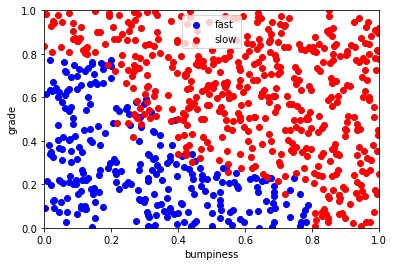

In [5]:
#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()

In [26]:
# adaboost
clf = AdaBoostClassifier(n_estimators=100)
clf = clf.fit(features_train, labels_train)

In [27]:
pred = clf.predict(features_test)
acc = accuracy_score(pred, labels_test)
print("accuracy of adaboost algo: ", acc)

accuracy of adaboost algo:  0.924


/Users/Damilya/Desktop/Udacity/ML/forked_udacity_ml/choose_your_own/class_vis.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)


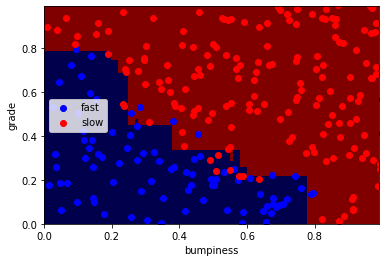

In [13]:
%matplotlib inline
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

As expected, the visualisation of the adaboost algo resembles with a typical decision tree algo: 90 degree corners at the boundaries aka mindcraft style map. 
Compared to 3 previous algos analyzed on the same dataset:
- 1) Naive Bayes: 0.9733
- 2) SVM: from 0.681 to 0.8925
- 3) Decision Tree: 0.9784

Adaboost has a lower accuracy rate compared to Naive Bayes and Decision Tree, but better rate compared to SVM